# Core - Project 4 - Part 1 - Zillow - Final

# BOOKMARK [10/26/22]
- See "Data/Census Demographics" for notebook for processing fresh census data instead of using kaggle (which is missing data dict)

- Share URL: https://docs.google.com/spreadsheets/d/1Mui3f_5AJA8gyabjPsw1toz7y6z0msfNq5uXfCm_81I/edit?usp=sharing
- Raw URL= "https://docs.google.com/spreadsheets/d/e/2PACX-1vRajWiv9hZFz3wD_IPQ3218j2_VaEIvsoIYFW4rmUWAeq3tFqVTwRlggq7YODylM1qZB0P2H5dgZDlN/pub?output=xlsx"

- Sheet Names:
    - ['Source Info', 'Data', 'Data Dictionary', 'Column Groups']

<h1>INSTRUCTIONS</h1>
<p>For this assignment, you will be starting an additional portfolio project that you will continue to build on over the remaining weeks of this stack.</p>
<ul><li>For Part 1, you will be selecting a dataset appropriate for time series analysis.</li><ul><li>You will prepare the time series data for visualization/analysis.</li><li>You will answer several stakeholder questions about your selected data.</li></ul></ul>
<h3><b>Dataset Options</b></h3>

<h4><b>2) Zillow Home Value Index - County Level</b></h4>
<p><br></p>
<ul><li>Source: Zillow’s Research Data<ul><li>Website: <a href="https://www.zillow.com/research/data/">https://www.zillow.com/research/data/</a></li><li>Zillow’s “Typical Home value” calculation for all US counties (monthly data)</li><li>Provided Data Set (10/13/22):<ul><li>Share URL: <a href="https://docs.google.com/spreadsheets/d/193Bp3a5U-yc_R9yf_CERxhhjbL-C-stpr0OnyzJ0WBo/edit?usp=sharing">https://docs.google.com/spreadsheets/d/193Bp3a5U-yc_R9yf_CERxhhjbL-C-stpr0OnyzJ0WBo/edit?usp=sharing</a> </li><li>Raw URL (Pandas): <a href="https://docs.google.com/spreadsheets/d/e/2PACX-1vSR3MDKIwKjISZ8zW60j_4tmNpsJVBaM_4i7uXb8KTo9OdTU_0ceutNO7RKZBOOnATy3Jnr6q5XBW2K/pub?output=csv">https://docs.google.com/spreadsheets/d/e/2PACX-1vSR3MDKIwKjISZ8zW60j_4tmNpsJVBaM_4i7uXb8KTo9OdTU_0ceutNO7RKZBOOnATy3Jnr6q5XBW2K/pub?output=csv</a> </li></ul></li><li>(Optional) Original Download Details (see screenshot below):<ul><li>Use the HOME VALUES data</li><li>Data Type: “ZHVI All Homes (SFR, Condo/Co-Op) Time Series Smoothed Seasonally Adjusted”</li><li>Geography:<ul><li>County</li></ul></li></ul></li></ul></li></ul>
<ul><li>Supplemental Data<ul><li>County Demographics:<ul><li>Kaggle: US Census Demographic Data<ul><li>Original Source: <a href="https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data?select=acs2017_census_tract_data.csv">https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data?select=acs2017_census_tract_data.csv</a></li><li>Provided Version:<ul><li>Share URL:  <a href="https://docs.google.com/spreadsheets/d/1sKN1P0J7SRZSPPJeAZGlQFeqhBocdQ2l_z2ZYKdmAto/edit?usp=sharing">https://docs.google.com/spreadsheets/d/1sKN1P0J7SRZSPPJeAZGlQFeqhBocdQ2l_z2ZYKdmAto/edit?usp=sharing</a> </li><li>Raw URL (Pandas): <a href="https://docs.google.com/spreadsheets/d/e/2PACX-1vSdYxnpMF1U1g_bWlYsQrP4FoQw-s8uWcNryM1MmjIcf0H10o5rtlheeCZlh2TwRICog4MzNUxrvpjR/pub?output=csv">https://docs.google.com/spreadsheets/d/e/2PACX-1vSdYxnpMF1U1g_bWlYsQrP4FoQw-s8uWcNryM1MmjIcf0H10o5rtlheeCZlh2TwRICog4MzNUxrvpjR/pub?output=csv</a><a href="https://docs.google.com/spreadsheets/d/e/2PACX-1vREIJfarqIOKCmqhN7I-rvm01sNmlVpb8x6nQdOALWxCiDcJl3sMdZ2EnUrvPGyeTBEdEdOrFpW-6dG/pub?output=csv"></a></li></ul></li></ul></li></ul></li></ul></li><li>Notes/Considerations:<ul><li>The “RegionName” column from Zillow and “County” column from the demographic data need the text normalization to be matched (capitalization/abbreviations)</li><li>To answer some of the questions, you will need to use the demographic dataset in conjunction with the Zillow county dataset.</li></ul></li></ul>
<p><br></p>
<ul></ul>

### Tasks/Questions

- Which county had the largest percent increase in value from  01/2009 to 01/2019?
- Which county lost the largest percentage of value from 02/2019 to 02/2022?
- 

# SOLUTION

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize'] = (12,4)
# set random seed
SEED = 321
np.random.seed(SEED)

pd.set_option('display.max_columns',100)

In [4]:
import json
# zillow_fpath = "../Data/Zillow/County_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
zillow_fpath ="https://docs.google.com/spreadsheets/d/e/2PACX-1vSR3MDKIwKjISZ8zW60j_4tmNpsJVBaM_4i7uXb8KTo9OdTU_0ceutNO7RKZBOOnATy3Jnr6q5XBW2K/pub?output=csv"
# demo_fpath = '../Data/us-census-demographic-data/acs2017_census_tract_data.csv'
# demo_fpath = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSdYxnpMF1U1g_bWlYsQrP4FoQw-s8uWcNryM1MmjIcf0H10o5rtlheeCZlh2TwRICog4MzNUxrvpjR/pub?output=csv"
demo_fpath = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRajWiv9hZFz3wD_IPQ3218j2_VaEIvsoIYFW4rmUWAeq3tFqVTwRlggq7YODylM1qZB0P2H5dgZDlN/pub?output=xlsx"

# demo_json = "../Data/Census Demographics/Final-County-Data/us-demographics-data-and-dictionary.json"

# with open(demo_json) as f:
    
#     demographics = json.load(f)
# demographics.keys()



In [5]:
df = pd.read_csv(zillow_fpath)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,...,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,214953.0,215062.0,216042.0,217821.0,220034.0,222055.0,224131.0,226482.0,228614.0,230341.0,232000.0,233669.0,234852.0,235946.0,237371.0,239599.0,241819.0,244112.0,246487.0,249122.0,251403.0,253839.0,255964.0,258325.0,260072.0,262122.0,264699.0,268089.0,271813.0,275443.0,280167.0,285209.0,290619.0,295437.0,300236.0,304799.0,308376.0,311522.0,315296.0,319263.0,324392.0,...,623824.0,624978.0,628401.0,630693.0,630421.0,629851.0,627695.0,625877.0,625427.0,626289.0,628069.0,626013.0,625972.0,627232.0,631901.0,634612.0,637790.0,640890.0,647415.0,654188.0,659685.0,657522.0,654806.0,657365.0,666378.0,677443.0,687361.0,695036.0,700433.0,704207.0,711163.0,718114.0,728458.0,742277.0,759934.0,779724.0,791646.0,800220.0,802733.0,807252.0,812570.0,817701.0,826057.0,840603.0,858224.0,873413.0,875084.0,874583.0,861491.0,850899
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,176013.0,176304.0,176984.0,178182.0,179566.0,180760.0,182114.0,183633.0,185250.0,186936.0,188729.0,190457.0,191938.0,193038.0,194481.0,195834.0,197462.0,198774.0,200070.0,201587.0,203227.0,205103.0,206625.0,207853.0,209056.0,210279.0,211959.0,213090.0,214437.0,215312.0,216880.0,218632.0,220738.0,222567.0,223869.0,225368.0,226891.0,228667.0,230123.0,231746.0,232835.0,...,249796.0,250382.0,250772.0,251689.0,252450.0,252882.0,253498.0,253799.0,254194.0,253867.0,253409.0,253184.0,252820.0,252605.0,252090.0,251861.0,251750.0,252180.0,252743.0,253014.0,252784.0,252470.0,252498.0,253934.0,255799.0,259546.0,262891.0,265697.0,267360.0,267995.0,270273.0,272019.0,275032.0,276818.0,279849.0,283399.0,287155.0,289751.0,292248.0,295155.0,297893.0,300475.0,302238.0,304821.0,306989.0,310467.0,313286.0,315291.0,315783.0,316351
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,115327.0,115323.0,115094.0,115067.0,115015.0,115257.0,115443.0,115754.0,116156.0,116426.0,117037.0,117614.0,117867.0,117822.0,117281.0,117069.0,117021.0,117213.0,117393.0,117245.0,117371.0,117606.0,117919.0,118103.0,118252.0,118495.0,119056.0,119697.0,120266.0,120700.0,121182.0,121797.0,122325.0,122670.0,122940.0,123121.0,123450.0,123656.0,124026.0,124242.0,124486.0,...,194584.0,195527.0,196523.0,197444.0,198303.0,199347.0,200181.0,200571.0,200556.0,200646.0,201149.0,201634.0,202149.0,202344.0,203183.0,203869.0,204510.0,204204.0,204375.0,205322.0,206734.0,207612.0,207973.0,208431.0,209397.0,211593.0,213931.0,216483.0,218618.0,220702.0,223258.0,224496.0,226318.0,228575.0,233478.0,238851.0,244640.0,249065.0,252863.0,255459.0,258532.0,261735.0,265373.0,270086.0,275184.0,280176.0,284030.0,286580.0,288135.0,288502
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,143100.0,143476.0,143933.0,144832.0,145732.0,146409.0,147136.0,147829.0,148663.0,149378.0,150092.0,150801.0,151505.0,152198.0

## Preparing Zillow TS

In [6]:
id_cols = df.columns[:9]
id_cols

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'StateCodeFIPS', 'MunicipalCodeFIPS'],
      dtype='object')

- Will want to save the non-ts metadata from zillow to join with demographics

### Saving Metadata/County Info 

In [52]:
demo = pd.read_excel(demo_fpath, sheet_name='Data')
demo

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001.0,Alabama,Autauga County,55036.0,26899.0,28137.0,2.7,75.4,18.9,0.3,0.9,0.0,41016.0,55317.0,2838.0,27824.0,2024.0,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112.0,74.1,20.2,5.6,0.1,5.2
1,1003.0,Alabama,Baldwin County,203360.0,99527.0,103833.0,4.4,83.1,9.5,0.8,0.7,0.0,155376.0,52562.0,1348.0,29364.0,735.0,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527.0,80.7,12.9,6.3,0.1,5.5
2,1005.0,Alabama,Barbour County,26201.0,13976.0,12225.0,4.2,45.7,47.8,0.2,0.6,0.0,20269.0,33368.0,2551.0,17561.0,798.0,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878.0,74.1,19.1,6.5,0.3,12.4
3,1007.0,Alabama,Bibb County,22580.0,12251.0,10329.0,2.4,74.6,22.0,0.4,0.0,0.0,17662.0,43404.0,3431.0,20911.0,1889.0,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171.0,76.0,17.4,6.3,0.3,8.2
4,1009.0,Alabama,Blount County,57667.0,28490.0,29177.0,9.0,87.4,1.5,0.3,0.1,0.0,42513.0,47412.0,2630.0,22021.0,850.0,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380.0,83.9,11.9,4.0,0.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145.0,Puerto Rico,Vega Baja Municipio,54754.0,26269.0,28485.0,96.7,3.1,0.1,0.0,0.0,0.0,42838.0,18900.0,1219.0,10197.0,576.0,43.8,49.4,28.6,20.2,25.9,11.1,14.2,92.0,4.2,0.9,1.4,0.6,0.9,31.6,14234.0,76.2,19.3,4.3,0.2,16.8
3216,72147.0,Puerto Rico,Vieques Municipio,8931.0,4351.0,4580.0,95.7,4.0,0.0,0.0,0.0,0.0,7045.0,16261.0,2414.0,11136.0,1459.0,36.8,68.2,20.9,38.4,16.4,16.9,7.3,76.3,16.9,0.0,5.0,0.0,1.7,14.9,2927.0,40.7,40.9,18.4,0.0,12.8
3217,72149.0,Puerto Rico,Villalba Municipio,23659.0,11510.0,12149.0,99.7,0.2,0.1,0.0,0.0,0.0,18053.0,19893.0,1935.0,10449.0,1619.0,50.0,67.9,22.5,21.2,22.7,14.1,19.5,83.1,11.8,0.1,2.1,0.0,2.8,28.4,6873.0,59.2,30.2,10.4,0.2,24.8
3218,72151.0,Puerto Rico,Yabucoa Municipio,35025.0,16984.0,18041.0,99.9,0.1,0.0,0.0,0.0,0.0,27523.0,15586.0,1467.0,8672.0,702.0,52.4,62.1,27.7,26.0,20.7,9.5,16.0,87.6,9.2,0.0,1.4,1.8,0.1,30.5,7878.0,62.7,30.9,6.3,0.0,25.4


In [53]:
demo_dict = pd.read_excel(demo_fpath, sheet_name='Data Dictionary')
demo_dict

,Column,Definition
0,CountyId,ID # for County
1,State,US State that contains county
2,County,Name of County
3,TotalPop,Total population (#)
4,Men,Total # of men
5,Women,Total # of women
6,Hispanic,% population identifies as Hispanic
7,White,% population identifies as White
8,Black,% pozpulation identifies as Black
9,Native,% population identifies as Native American


In [54]:
## normalizing capitalization
df['RegionName'] = df['RegionName'].str.title()
demo['County'] = demo['County'].str.title()

In [55]:
## normalizing "St." vs "Saint"
demo['County'] = demo['County'].str.replace('St. ','Saint ', regex=False)
display(df.head(),demo.head())

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,...,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,214953.0,215062.0,216042.0,217821.0,220034.0,222055.0,224131.0,226482.0,228614.0,230341.0,232000.0,233669.0,234852.0,235946.0,237371.0,239599.0,241819.0,244112.0,246487.0,249122.0,251403.0,253839.0,255964.0,258325.0,260072.0,262122.0,264699.0,268089.0,271813.0,275443.0,280167.0,285209.0,290619.0,295437.0,300236.0,304799.0,308376.0,311522.0,315296.0,319263.0,324392.0,...,623824.0,624978.0,628401.0,630693.0,630421.0,629851.0,627695.0,625877.0,625427.0,626289.0,628069.0,626013.0,625972.0,627232.0,631901.0,634612.0,637790.0,640890.0,647415.0,654188.0,659685.0,657522.0,654806.0,657365.0,666378.0,677443.0,687361.0,695036.0,700433.0,704207.0,711163.0,718114.0,728458.0,742277.0,759934.0,779724.0,791646.0,800220.0,802733.0,807252.0,812570.0,817701.0,826057.0,840603.0,858224.0,873413.0,875084.0,874583.0,861491.0,850899
1,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,176013.0,176304.0,176984.0,178182.0,179566.0,180760.0,182114.0,183633.0,185250.0,186936.0,188729.0,190457.0,191938.0,193038.0,194481.0,195834.0,197462.0,198774.0,200070.0,201587.0,203227.0,205103.0,206625.0,207853.0,209056.0,210279.0,211959.0,213090.0,214437.0,215312.0,216880.0,218632.0,220738.0,222567.0,223869.0,225368.0,226891.0,228667.0,230123.0,231746.0,232835.0,...,249796.0,250382.0,250772.0,251689.0,252450.0,252882.0,253498.0,253799.0,254194.0,253867.0,253409.0,253184.0,252820.0,252605.0,252090.0,251861.0,251750.0,252180.0,252743.0,253014.0,252784.0,252470.0,252498.0,253934.0,255799.0,259546.0,262891.0,265697.0,267360.0,267995.0,270273.0,272019.0,275032.0,276818.0,279849.0,283399.0,287155.0,289751.0,292248.0,295155.0,297893.0,300475.0,302238.0,304821.0,306989.0,310467.0,313286.0,315291.0,315783.0,316351
2,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,115327.0,115323.0,115094.0,115067.0,115015.0,115257.0,115443.0,115754.0,116156.0,116426.0,117037.0,117614.0,117867.0,117822.0,117281.0,117069.0,117021.0,117213.0,117393.0,117245.0,117371.0,117606.0,117919.0,118103.0,118252.0,118495.0,119056.0,119697.0,120266.0,120700.0,121182.0,121797.0,122325.0,122670.0,122940.0,123121.0,123450.0,123656.0,124026.0,124242.0,124486.0,...,194584.0,195527.0,196523.0,197444.0,198303.0,199347.0,200181.0,200571.0,200556.0,200646.0,201149.0,201634.0,202149.0,202344.0,203183.0,203869.0,204510.0,204204.0,204375.0,205322.0,206734.0,207612.0,207973.0,208431.0,209397.0,211593.0,213931.0,216483.0,218618.0,220702.0,223258.0,224496.0,226318.0,228575.0,233478.0,238851.0,244640.0,249065.0,252863.0,255459.0,258532.0,261735.0,265373.0,270086.0,275184.0,280176.0,284030.0,286580.0,288135.0,288502
3,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,143100.0,143476.0,143933.0,144832.0,145732.0,146409.0,147136.0,147829.0,148663.0,149378.0,150092.0,150801.0,151505.0,152198.0

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001.0,Alabama,Autauga County,55036.0,26899.0,28137.0,2.7,75.4,18.9,0.3,0.9,0.0,41016.0,55317.0,2838.0,27824.0,2024.0,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112.0,74.1,20.2,5.6,0.1,5.2
1,1003.0,Alabama,Baldwin County,203360.0,99527.0,103833.0,4.4,83.1,9.5,0.8,0.7,0.0,155376.0,52562.0,1348.0,29364.0,735.0,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527.0,80.7,12.9,6.3,0.1,5.5
2,1005.0,Alabama,Barbour County,26201.0,13976.0,12225.0,4.2,45.7,47.8,0.2,0.6,0.0,20269.0,33368.0,2551.0,17561.0,798.0,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878.0,74.1,19.1,6.5,0.3,12.4
3,1007.0,Alabama,Bibb County,22580.0,12251.0,10329.0,2.4,74.6,22.0,0.4,0.0,0.0,17662.0,43404.0,3431.0,20911.0,1889.0,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171.0,76.0,17.4,6.3,0.3,8.2
4,1009.0,Alabama,Blount County,57667.0,28490.0,29177.0,9.0,87.4,1.5,0.3,0.1,0.0,42513.0,47412.0,2630.0,22021.0,850.0,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380.0,83.9,11.9,4.0,0.1,4.9


In [56]:
# county_info = df[id_cols].copy()
# county_info

In [57]:
# county_data = pd.merge(county_info, demo, left_on='RegionName', right_on='County',
#                       how='left')
# county_data

In [58]:
# county_data.isna().sum()

In [59]:
# missing_demo = county_data[county_data['State_y'].isna()]
# missing_demo

In [60]:
# missing_demo.sort_values(['StateName','RegionName'])

### Melting TS

In [61]:
melted = pd.melt(df, id_vars=id_cols, value_name='Home Value', 
                      var_name="Month")
melted['Month'] = pd.to_datetime(melted['Month'])
melted = melted.set_index('Month')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,Home Value
Month,,,,,,,,,,
2000-01-31,3101,0,Los Angeles County,county,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",6,37,214953.0
2000-01-31,139,1,Cook County,county,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",17,31,176013.0
2000-01-31,1090,2,Harris County,county,TX,TX,"Houston-The Woodlands-Sugar Land, TX",48,201,115327.0
2000-01-31,2402,3,Maricopa County,county,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",4,13,143100.0
2000-01-31,2841,4,San Diego County,county,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",6,73,223708.0
...,...,...,...,...,...,...,...,...,...,...
2022-09-30,828,3104,Alpine County,county,CA,CA,NaN,6,3,584777.0
2022-09-30,2345,3113,Hinsdale County,county,CO,CO,NaN,8,53,477765.0
2022-09-30,1933,3114,Mineral County,county,CO,CO,NaN,8,79,404852.0


In [62]:
zillow_ts = melted.groupby('RegionName').resample('M').mean()
zillow_ts

RegionID  SizeRank  StateCodeFIPS  \
RegionName       Month                                           
Abbeville County 2000-01-31    2606.0    1618.0           45.0   
                 2000-02-29    2606.0    1618.0           45.0   
                 2000-03-31    2606.0    1618.0           45.0   
                 2000-04-30    2606.0    1618.0           45.0   
                 2000-05-31    2606.0    1618.0           45.0   
...                               ...       ...            ...   
Zavala County    2022-05-31    1507.0    2286.0           48.0   
                 2022-06-30    1507.0    2286.0           48.0   
                 2022-07-31    1507.0    2286.0           48.0   
                 2022-08-31    1507.0    2286.0           48.0   
                 2022-09-30    1507.0    2286.0           48.0   

                             MunicipalCodeFIPS  Home Value  
RegionName       Month                                      
Abbeville County 2000-01-31                1.0     65966.0  
                 2000-02-29                1.0     65953.0  
                 2000-03-31                1.0     65728.0  
                 2000-04-30                1.0     65233.0  
                 2000-05-31                1.0     64782.0  
...                                        ...         ...  
Zavala County    2022-05-31              507.0     89797.0  
                 2022-06-30              507.0     91981.0  
                 2022-07-31              507.0     94149.0  
                 2022-08-31              507.0     95646.0  
                 2022-09-30              507.0     96384.0  

[467922 rows x 5 columns]

## Answering Questions

In [73]:
demo[demo['County'].str.contains("Ann")]

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
1194,24003.0,Maryland,Anne Arundel County,564600.0,279581.0,285019.0,7.3,69.6,15.9,0.1,3.6,0.1,418118.0,94502.0,1251.0,43258.0,544.0,6.1,7.4,47.0,15.4,23.0,7.5,7.1,80.1,7.5,3.6,2.3,1.4,5.1,30.2,290628.0,72.2,23.3,4.4,0.1,5.2
1209,24035.0,Maryland,Queen Anne'S County,49071.0,24230.0,24841.0,3.7,86.6,7.0,0.0,0.5,0.0,37499.0,89241.0,3843.0,40553.0,1527.0,6.4,8.3,41.9,14.6,26.2,9.3,8.0,77.7,9.8,2.2,1.6,1.2,7.6,36.2,25556.0,71.1,20.4,8.2,0.2,3.7


In [78]:
df[df['RegionName'].str.contains("Ann")]

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,...,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
115,3152,115,Anne Arundel County,county,MD,MD,"Baltimore-Columbia-Towson, MD",24,3,183982.0,183729.0,184201.0,184961.0,186236.0,187407.0,188504.0,189535.0,190411.0,191294.0,192221.0,193390.0,194523.0,195703.0,196661.0,197457.0,198311.0,199384.0,200853.0,202437.0,204054.0,205561.0,206832.0,208278.0,209981.0,212125.0,214014.0,216123.0,219077.0,222917.0,226467.0,229200.0,231627.0,234634.0,237131.0,239782.0,241728.0,244143.0,246642.0,249500.0,252026.0,...,362202.0,362342.0,362050.0,362349.0,362671.0,362761.0,362290.0,362211.0,363475.0,364970.0,365045.0,364755.0,363865.0,364624.0,364869.0,366431.0,366928.0,368928.0,368722.0,369622.0,369643.0,370621.0,371539.0,373573.0,377454.0,381284.0,386145.0,389543.0,393381.0,395142.0,399382.0,404699.0,410391.0,414747.0,419697.0,424188.0,427264.0,428184.0,428807.0,431449.0,433964.0,438100.0,441908.0,446150.0,450241.0,454505.0,457734.0,459540.0,460527.0,461222
987,3118,989,Queen Annes County,county,MD,MD,"Baltimore-Columbia-Towson, MD",24,35,187733.0,188040.0,188364.0,189237.0,190482.0,191883.0,193301.0,194366.0,195384.0,196241.0,197624.0,199088.0,200676.0,202106.0,203690.0,205361.0,207722.0,210020.0,212343.0,213087.0,213721.0,214055.0,215040.0,216006.0,217083.0,218424.0,220155.0,222332.0,224647.0,226761.0,229005.0,231325.0,233981.0,237363.0,240648.0,243648.0,246480.0,249767.0,252948.0,255679.0,258555.0,...,327635.0,325990.0,325753.0,328133.0,330497.0,331795.0,332431.0,334923.0,338459.0,339957.0,339793.0,338852.0,340734.0,342235.0,342632.0,341697.0,341312.0,342801.0,344280.0,344531.0,344613.0,345136.0,346281.0,348073.0,350240.0,352348.0,357666.0,363363.0,370966.0,374938.0,379017.0,382206.0,386645.0,392753.0,399815.0,406881.0,412041.0,415650.0,419335.0,423882.0,429530.0,433557.0,436342.0,439018.0,443471.0,448812.0,453257.0,456554.0,458223.0,460859


### Q1: Do the counties with the longest commute times (>40 mins) have higher or lower home values than the national average?

<AxesSubplot:xlabel='MeanCommute', ylabel='Count'>

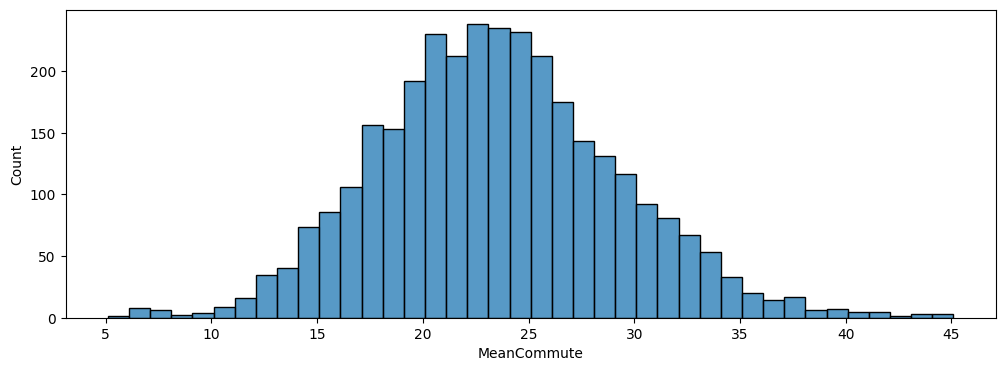

In [74]:
sns.histplot(demo['MeanCommute'])

In [75]:
demo[demo['MeanCommute']  > 40]

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
264,8039.0,Colorado,Elbert County,24553.0,12442.0,12111.0,6.5,89.4,0.6,0.5,0.6,0.0,18801.0,92849.0,4456.0,42522.0,2128.0,4.8,5.0,42.3,14.4,20.1,12.2,11.0,77.9,9.4,0.1,0.9,1.0,10.7,40.4,13086.0,75.1,15.8,8.7,0.4,3.6
291,8093.0,Colorado,Park County,16900.0,8935.0,7965.0,5.9,89.7,0.1,1.1,1.0,0.7,13786.0,61644.0,5623.0,34377.0,2607.0,6.6,7.8,33.8,16.9,25.6,15.6,8.1,71.8,10.3,1.5,1.1,1.7,13.6,40.9,9044.0,72.0,16.9,10.2,0.9,4.6
1142,22059.0,Louisiana,Lasalle Parish,14930.0,7691.0,7239.0,2.8,82.9,12.0,1.3,0.0,0.1,11131.0,34712.0,3487.0,18836.0,1820.0,24.8,32.2,29.0,16.8,22.4,22.4,9.4,85.1,7.8,1.1,0.5,3.0,2.5,41.5,4829.0,75.9,17.8,6.3,0.0,6.1
1196,24009.0,Maryland,Calvert County,90824.0,45184.0,45640.0,3.6,78.8,11.7,0.2,1.6,0.0,68233.0,100350.0,4007.0,41469.0,1123.0,5.7,5.5,41.0,15.0,23.0,13.0,8.1,81.7,8.4,3.0,0.7,0.9,5.3,41.9,45756.0,67.1,28.1,4.7,0.1,7.3
1200,24017.0,Maryland,Charles County,156021.0,75368.0,80653.0,5.4,43.1,42.8,0.6,3.1,0.1,114231.0,93973.0,2130.0,38890.0,786.0,6.9,9.5,42.2,17.0,24.7,8.6,7.4,81.4,7.3,5.8,1.1,0.6,3.7,43.9,78635.0,65.7,30.9,3.2,0.2,4.5
1830,36005.0,New York,Bronx County,1455846.0,685636.0,770210.0,55.7,9.5,29.4,0.2,3.6,0.0,849295.0,36593.0,389.0,19721.0,199.0,29.7,41.8,25.0,33.4,23.5,7.1,11.1,23.0,4.4,60.2,7.6,1.8,3.1,44.2,593858.0,80.0,14.6,5.3,0.1,11.6
1851,36047.0,New York,Kings County,2635121.0,1247773.0,1387348.0,19.3,36.0,30.6,0.1,11.8,0.0,1657808.0,52782.0,467.0,29928.0,245.0,21.9,30.4,40.8,23.1,21.5,6.2,8.5,18.4,4.3,61.8,8.6,2.7,4.3,42.4,1217976.0,79.4,13.9,6.6,0.1,8.1
1868,36081.0,New York,Queens County,2339280.0,1134031.0,1205249.0,28.0,25.4,17.2,0.2,25.1,0.0,1413921.0,62008.0,471.0,28814.0,216.0,13.7,18.2,33.3,24.6,23.3,8.2,10.7,31.8,6.7,51.7,5.8,1.5,2.6,43.5,1142363.0,80.1,13.7,6.1,0.1,6.9
1870,36085.0,New York,Richmond County,475948.0,230325.0,245623.0,18.2,62.1,9.4,0.1,8.4,0.0,336177.0,76244.0,1481.0,33922.0,471.0,12.9,17.9,40.7,19.3,23.2,8.7,8.1,56.1,7.9,29.9,2.5,1.0,2.5,44.0,212253.0,74.6,21.0,4.3,0.1,5.5
2295,42103.0,Pennsylvania,Pike County,55687.0,27956.0,27731.0,10.3,81.1,5.7,0.1,1.2,0.0,43397.0,63417.0,3058.0,31156.0,1331.0,9.9,16.4,32.5,19.6,24.7,13.4,9.7,81.0,7.0,3.0,2.4,0.9,5.7,44.2,24832.0,78.6,14.1,7.0,0.3,7.8


In [70]:
demo.sort_values(by='MeanCommute', ascending=False)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2999,54015.0,West Virginia,Clay County,8901.0,4443.0,4458.0,0.3,97.7,0.0,0.5,0.0,0.1,6871.0,34242.0,4957.0,16229.0,1461.0,25.2,24.5,24.6,22.3,15.3,19.2,18.7,73.1,21.0,0.7,1.3,0.6,3.3,45.1,2516.0,71.9,23.1,4.4,0.7,10.8
1830,36005.0,New York,Bronx County,1455846.0,685636.0,770210.0,55.7,9.5,29.4,0.2,3.6,0.0,849295.0,36593.0,389.0,19721.0,199.0,29.7,41.8,25.0,33.4,23.5,7.1,11.1,23.0,4.4,60.2,7.6,1.8,3.1,44.2,593858.0,80.0,14.6,5.3,0.1,11.6
2295,42103.0,Pennsylvania,Pike County,55687.0,27956.0,27731.0,10.3,81.1,5.7,0.1,1.2,0.0,43397.0,63417.0,3058.0,31156.0,1331.0,9.9,16.4,32.5,19.6,24.7,13.4,9.7,81.0,7.0,3.0,2.4,0.9,5.7,44.2,24832.0,78.6,14.1,7.0,0.3,7.8
1870,36085.0,New York,Richmond County,475948.0,230325.0,245623.0,18.2,62.1,9.4,0.1,8.4,0.0,336177.0,76244.0,1481.0,33922.0,471.0,12.9,17.9,40.7,19.3,23.2,8.7,8.1,56.1,7.9,29.9,2.5,1.0,2.5,44.0,212253.0,74.6,21.0,4.3,0.1,5.5
1200,24017.0,Maryland,Charles County,156021.0,75368.0,80653.0,5.4,43.1,42.8,0.6,3.1,0.1,114231.0,93973.0,2130.0,38890.0,786.0,6.9,9.5,42.2,17.0,24.7,8.6,7.4,81.4,7.3,5.8,1.1,0.6,3.7,43.9,78635.0,65.7,30.9,3.2,0.2,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2188.0,Alaska,Northwest Arctic Borough,7715.0,4168.0,3547.0,2.5,11.1,0.5,81.6,0.9,0.0,4964.0,61533.0,2830.0,21879.0,1159.0,25.3,32.2,35.9,20.1,20.4,12.2,11.5,18.5,10.6,0.3,44.6,21.1,5.0,6.5,2654.0,50.2,47.7,2.0,0.1,20.1
94,2282.0,Alaska,Yakutat City And Borough,682.0,366.0,316.0,5.6,43.7,0.9,28.3,5.4,1.3,522.0,64583.0,11434.0,32393.0,4250.0,6.2,10.1,24.9,18.6,23.6,21.0,11.9,48.7,14.3,0.8,26.9,5.0,4.2,6.5,377.0,45.6,44.0,10.3,0.0,6.5
85,2185.0,Alaska,North Slope Borough,9757.0,6097.0,3660.0,4.1,31.3,0.5,50.9,5.6,1.6,7083.0,77266.0,11624.0,48777.0,2528.0,10.2,16.7,31.9,15.4,17.4,17.3,18.0,23.2,15.3,4.0,49.7,5.6,2.3,6.1,5412.0,71.3,28.0,0.7,0.0,9.5
90,2230.0,Alaska,Skagway Municipality,1038.0,594.0,444.0,6.8,78.6,0.2,5.3,4.0,0.0,870.0,70673.0,6701.0,39376.0,4370.0,5.6,5.3,29.7,23.8,22.7,8.8,15.0,42.0,6.4,1.0,37.2,6.8,6.5,6.1,701.0,69.8,22.1,7.8,0.3,7.9


In [30]:
county_data

<AxesSubplot:>

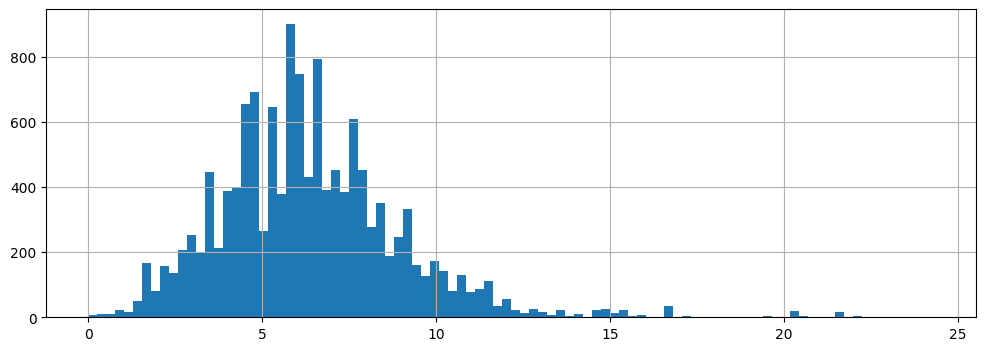

In [31]:
county_data['Unemployment'].hist(bins='auto')

### Plot the Home Values for the County with the Highest Population vs the Lowest

In [91]:
high_pop = demo.nlargest(1,columns='TotalPop').iloc[0]['County']
high_pop

'Los Angeles County'

In [92]:
small_pop = demo.nsmallest(1,columns='TotalPop').iloc[0]['County']
small_pop

'Loving County'

In [95]:
high_pop_ts = zillow_ts.loc[high_pop]
high_pop_ts

,RegionID,SizeRank,StateCodeFIPS,MunicipalCodeFIPS,Home Value
Month,,,,,
2000-01-31,3101.0,0.0,6.0,37.0,214953.0
2000-02-29,3101.0,0.0,6.0,37.0,215062.0
2000-03-31,3101.0,0.0,6.0,37.0,216042.0
2000-04-30,3101.0,0.0,6.0,37.0,217821.0
2000-05-31,3101.0,0.0,6.0,37.0,220034.0
...,...,...,...,...,...
2022-05-31,3101.0,0.0,6.0,37.0,873413.0
2022-06-30,3101.0,0.0,6.0,37.0,875084.0
2022-07-31,3101.0,0.0,6.0,37.0,874583.0


In [96]:
small_pop_ts = zillow_ts.loc[small_pop]
small_pop_ts

KeyError: 'Loving County'

- Loving County doesn't exist in the zillow data

In [102]:
df.nlargest(5,columns=['SizeRank'])

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,...,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
2837,2518,3132,San Juan County,county,CO,CO,NaN,8,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,314502.0,316874.0,318293.0,319610.0,320212.0,320502.0,321522.0,323417.0,325767.0,327888.0,330059.0,332233.0,334284.0,336538.0,338281.0,338419.0,337177.0,336283.0,337161.0,338613.0,339653.0,339835.0,340593.0,341769.0,343435.0,344964.0,347117.0,350325.0,353131.0,359468.0,366650.0,374816.0,380206.0,384348.0,390682.0,396675.0,404529.0,412489.0,418541.0,422036.0,426868.0,433076.0,438827.0,440747.0,442036.0,445121.0,455384.0,469870.0,484936.0,492614
2836,1648,3129,Daggett County,county,UT,UT,NaN,49,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,208476.0,209315.0,210465.0,211046.0,212344.0,213754.0,215582.0,216723.0,217694.0,218863.0,220038.0,220719.0,221280.0,221307.0,221552.0,221389.0,221207.0,221283.0,221688.0,222576.0,222537.0,223129.0,223544.0,225065.0,226179.0,227317.0,228378.0,230661.0,233399.0,NaN,NaN,256964.0,263903.0,270651.0,277004.0,280960.0,285803.0,290216.0,294883.0,297799.0,305197.0,310924.0,315386.0,315278.0,316152.0,317716.0,323357.0,329235.0,336050.0,338258
2835,1933,3114,Mineral County,county,CO,CO,NaN,8,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,279421.0,279347.0,279983.0,280589.0,281285.0,281660.0,282537.0,283066.0,283541.0,284564.0,285057.0,285524.0,285003.0,285099.0,285397.0,285378.0,285145.0,289331.0,294141.0,299554.0,299924.0,300756.0,301357.0,303044.0,305945.0,309870.0,314067.0,319196.0,326321.0,332806.0,338144.0,342745.0,348869.0,355341.0,361294.0,366791.0,370538.0,371703.0,374135.0,376190.0,378156.0,377678.0,379642.0,383280.0,390966.0,397181.0,402780.0,404852
2834,2345,3113,Hinsdale County,county,CO,CO,NaN,8,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,347435.0,348190.0,349249.0,351581.0,351657.0,351739.0,349561.0,348854.0,347952.0,348201.0,348260.0,347946.0,348314.0,349624.0,351447.0,351512.0,351116.0,350566.0,351615.0,352358.0,353561.0,355175.0,358159.0,360292.0,365432.0,371984.0,382343.0,390965.0,398370.0,403378.0,405998.0,410844.0,414939.0,418720.0,419498.0,425545.0,433089.0,440586.0,443239.0,444800.0,447543.0,456618.0,465411.0,474876.0,477765
2833,828,3104,Alpine County,county,CA,CA,NaN,6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,437801.0,442834.0,444369.0,445250.0,446105.0,446174.0

In [104]:
df[df['RegionName'].str.contains('Loving')]

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,...,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
